## TEXT MINING ASSIGNMENT

### Group 3:

##### Aastha Joshi | 20020845001
##### Aishwarya Singh | 20020845004
##### Harsh Tambe | 20020845010
##### Joel Keith Pais | 20020845011
##### Taksande Sandeep Ravindra | 20020845030

*-----------------------------------------------------------------------------------------------------------------------------*

### Q1. Consider a small dataset of your choice and explore the same, stating your views on different parameters of the dataset.   

*-----------------------------------------------------------------------------------------------------------------------------*

### Data Description
#### CUST_ID : Identification of Credit Card holder (Categorical)
#### BALANCE : Balance amount left in their account to make purchases
#### BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
#### PURCHASES : Amount of purchases made from account
#### ONEOFF_PURCHASES : Maximum purchase amount done in one-go
#### INSTALLMENTS_PURCHASES : Amount of purchase done in installment
#### CASH_ADVANCE : Cash in advance given by the user
#### PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
#### ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
#### PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
#### CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
#### CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"
#### PURCHASES_TRX : Number of purchase transactions made
#### CREDIT_LIMIT : Limit of Credit Card for user
#### PAYMENTS : Amount of Payment done by user
#### MINIMUM_PAYMENTS : Minimum amount of payments made by user
#### PRC_FULL_PAYMENT : Percent of full payment paid by user
#### TENURE : Tenure of credit card service for user

*-----------------------------------------------------------------------------------------------------------------------------*

### I. Loading the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

### II. Reading the dataset

In [ ]:
df=pd.read_csv("CC GENERAL.csv")

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.shape

(8950, 18)

### III. Pre-processing

In [ ]:
# Creating a function to see the summary table to see the missing and unique values
def sumtable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [ ]:
sumtable(df[:10000])[:20] # Calling the function

Dataset Shape: (8950, 18)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,CUST_ID,object,0,8950,C10001,C10002,C10003,13.13
1,BALANCE,float64,0,8871,40.9007,3202.47,2495.15,13.07
2,BALANCE_FREQUENCY,float64,0,43,0.818182,0.909091,1,2.22
3,PURCHASES,float64,0,6203,95.4,0,773.17,10.39
4,ONEOFF_PURCHASES,float64,0,4014,0,0,773.17,7.10
5,INSTALLMENTS_PURCHASES,float64,0,4452,95.4,0,0,7.73
6,CASH_ADVANCE,float64,0,4323,0,6442.95,0,6.83
7,PURCHASES_FREQUENCY,float64,0,47,0.166667,0,1,3.65
8,ONEOFF_PURCHASES_FREQUENCY,float64,0,47,0,0,1,2.98
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,47,0.083333,0,0,3.18


##### We can see from the above summary table that there are missing values in the column MINIMUM_PAYMENTS. It has 313 missing values out of a total of 8636 rows. Since the percentage of missing values in the column is small i.e., only 3.5%, we decide to remove the missing values using the 'dropna' function. Dropna() by default removes rows and 'any' parameter removes any NA values that are present.

In [ ]:
df.dropna(how='any', inplace= True)

Let's check the summary table again.

In [ ]:
sumtable(df[:10000])[:20]

Dataset Shape: (8636, 18)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,CUST_ID,object,0,8636,C10001,C10002,C10003,13.08
1,BALANCE,float64,0,8631,40.9007,3202.47,2495.15,13.07
2,BALANCE_FREQUENCY,float64,0,42,0.818182,0.909091,1,2.08
3,PURCHASES,float64,0,6015,95.4,0,773.17,10.37
4,ONEOFF_PURCHASES,float64,0,3922,0,0,773.17,7.14
5,INSTALLMENTS_PURCHASES,float64,0,4341,95.4,0,0,7.76
6,CASH_ADVANCE,float64,0,4206,0,6442.95,0,6.86
7,PURCHASES_FREQUENCY,float64,0,47,0.166667,0,1,3.64
8,ONEOFF_PURCHASES_FREQUENCY,float64,0,47,0,0,1,3.00
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,47,0.083333,0,0,3.19


##### We see that the number of total rows have reduced by 313 and the shape of the dataset has become (8636,18). Thus, we have successfully cleaned the dataset and the data is now ready for further analysis.

### IV. Exploratory Data Analysis

In [ ]:
# To visualize all numerical columns the in boxplot, we have defined the variable 'columns'.
columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

##### Boxplots are useful visualizations that help show the outliers for a column in a dataset. A value is called an outlier if it is beyond the IQR (Interquartile Range). 
![image.png](attachment:image.png)

In [ ]:
# For visualizing the outliers using boxplots, we have specified a function called 'outliers'.
def outliers(df, columns):
    num_outliers = []
    percent_outliers = []
    total_rows = []
    interquartile_range = []
    for i in columns:
        q1 = df[i].quantile(.25)
        q3 = df[i].quantile(.65)
        iqr = q3 - q1
        outliers = len(df[(df[i] < (q1-1.5*iqr)) | (df[i] > (q3+1.5*iqr))])
        rows = len(df[i])
        pct = outliers/rows
        interquartile_range.append(iqr)
        num_outliers.append(outliers)
        percent_outliers.append(pct)
        total_rows.append(rows)
        
    count_outliers = pd.DataFrame({'Columns': columns
                               , 'Num_Outliers': num_outliers
                                , 'Percent_Outliers': percent_outliers
                                , 'IQR': interquartile_range
                               , 'Total_Rows': total_rows}).sort_values('Percent_Outliers', ascending=False)
    return count_outliers
# To view the dataframe
count_outliers = outliers(df=df, columns=columns)
count_outliers

,Columns,Num_Outliers,Percent_Outliers,IQR,Total_Rows
5,CASH_ADVANCE,2130,0.246642,462.611615,8636
3,ONEOFF_PURCHASES,1952,0.226031,279.070000,8636
15,PRC_FULL_PAYMENT,1883,0.218041,0.083333,8636
10,CASH_ADVANCE_TRX,1661,0.192334,2.000000,8636
7,ONEOFF_PURCHASES_FREQUENCY,1582,0.183187,0.166667,8636
14,MINIMUM_PAYMENTS,1549,0.179365,387.422428,8636
1,BALANCE_FREQUENCY,1511,0.174965,0.090909,8636
4,INSTALLMENTS_PURCHASES,1491,0.172649,294.922500,8636
2,PURCHASES,1426,0.165123,685.612500,8636
13,PAYMENTS,1357,0.157133,991.026289,8636


##### CASH_ADVANCE, ONEOFF_PURCHASES AND PRC_FULL_PAYMENT have maximum number of outliers.

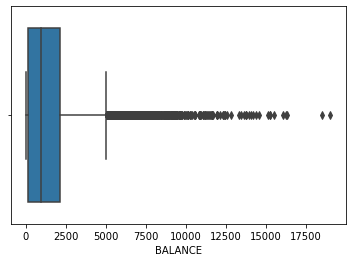

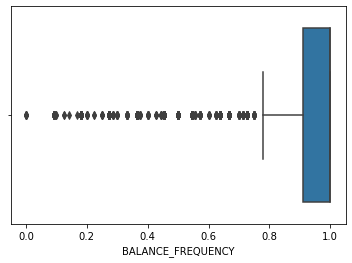

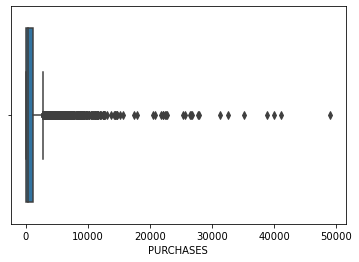

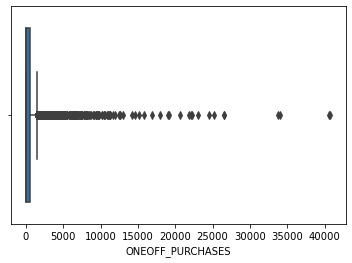

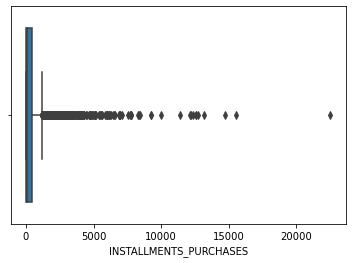

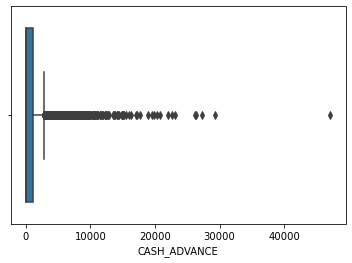

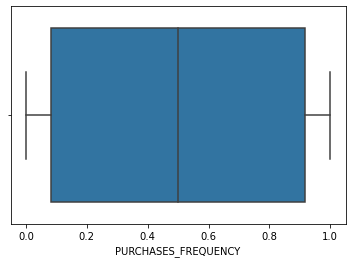

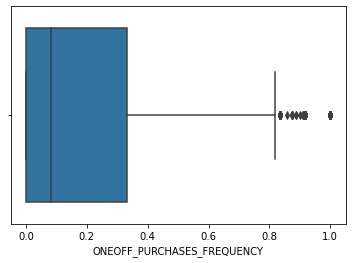

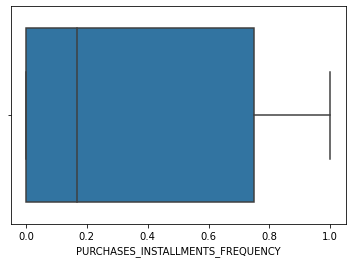

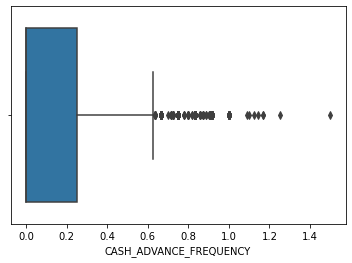

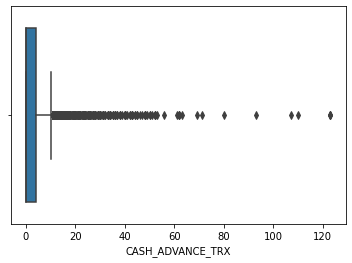

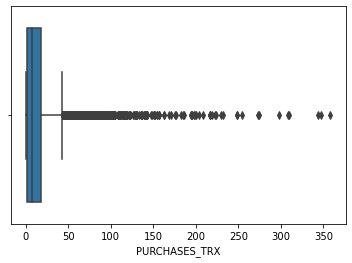

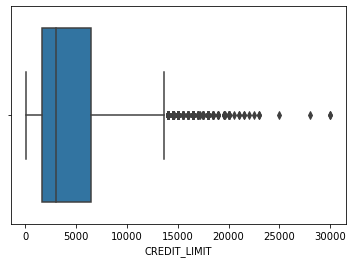

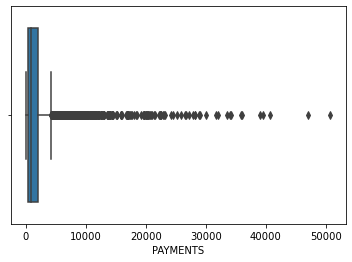

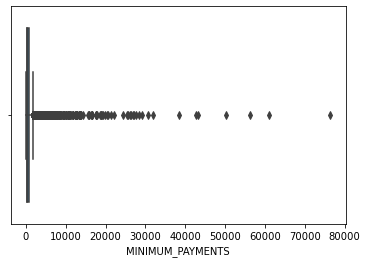

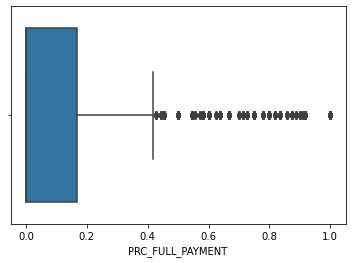

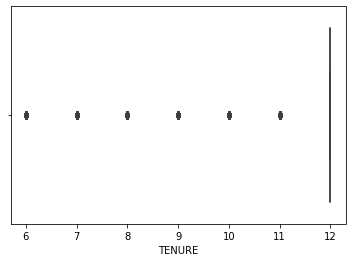

In [ ]:
# To visualize the various outliers graphically
for i in columns:
    sns.boxplot(df[i])
    plt.show()

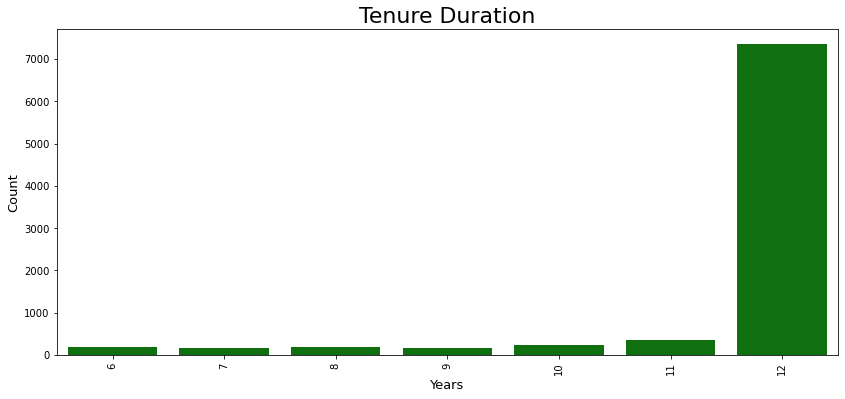

In [ ]:
# To visualize the tenure durations of the credit card users 
plt.figure(figsize = (14,6))
g = sns.countplot(x="TENURE", data=df, color='green')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Years", fontsize=13)
g.set_ylabel("Count", fontsize=13)
g.set_title("Tenure Duration", fontsize=22)
plt.show()

##### It can be observed that maximum users have been using the company's credit card service for 12 years. This shows that the company has a large loyal customer base.

In [ ]:
# To visualize the correlation matrix
df_corr = df.corr()
df_corr.style.background_gradient(cmap = 'RdYlGn')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


#### From the above correlation matrix, it can be observed that:
##### o ONEOFF_PURCHASES and PURCHASES are highly positively correlated. This can signify that maximum amount of purchases done by users are one-go payments.
##### o INSTALLMENTS_PURCHASES and PURCHASES are posititively correlated. This shows that a lot of people have maid payments using the installment facility.
##### o CREDIT_LIMIT and BALANCE is positively correlated. This shows that the users with a high credit card limit have a higher balance left in their account. Which can in turn signify that the people with higher credit card limit do not spend much.